# Crop Yield

In [1]:
from typing import TypeAlias
from typing import Optional, Any    

Number: TypeAlias = int | float

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from IPython.display import display
from copy import deepcopy

In [3]:
def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    
    ###Want to extract independent variable dataframes (features) and dependent variable dataframes (targets) from dataset
    #print(df)
    df_feature = df[feature_names]
    #print(df_feature)
    df_target = df[target_names]
    #print(df_target)
    
    return df_feature, df_target

In [4]:
master_df: pd.DataFrame = pd.read_csv("../Raw Data/rice-yields.csv")
#print(df)

In [27]:
working_df = deepcopy(master_df)
#print(working_df)

In [28]:
###Drop unused columns
working_df.drop(['Code'], axis=1, inplace = True)
#print(working_df)

In [29]:
#rename column names
working_df.rename(columns={"Entity": "Country", "Rice | 00000027 || Yield | 005419 || tonnes per hectare": "Rice Yield"}, inplace = True)
#print(working_df)

In [30]:
###Get dates between 1990 and 2019.
###This is like making another copy? So we are not modifying the working_df!
working_df_dated = working_df[(working_df.Year >= 1990) & (working_df.Year <= 2019)]

###Get selected countries.
countries = ["China", "India", "Thailand", "Vietnam"]
working_df_dated_country = working_df_dated[working_df_dated.Country.isin(countries)]

working_df_dated_country.reset_index(drop = True, inplace = True)

###Finalized df for crop yields for 4 countries.
print(working_df_dated_country)
#print(working_df)

     Country  Year  Rice Yield
0      China  1990      5.7261
1      China  1991      5.6402
2      China  1992      5.8031
3      China  1993      5.8479
4      China  1994      5.8311
..       ...   ...         ...
115  Vietnam  2015      5.7597
116  Vietnam  2016      5.5738
117  Vietnam  2017      5.5476
118  Vietnam  2018      5.8180
119  Vietnam  2019      5.8371

[120 rows x 3 columns]


In [31]:
###We access each country's data and plot against time
###India!
india_df = working_df_dated_country[working_df_dated_country.Country == "India"]
india_rice_yield_df, india_years_df = get_features_targets(india_df, ["Rice Yield"], ["Year"])
india_rice_yield_df.reset_index(drop = True, inplace = True)
india_years_df.reset_index(drop = True, inplace = True)
india_rice_yield_array = india_rice_yield_df.to_numpy()
india_years_array = india_years_df.to_numpy()
#print(china_rice_yield_array)
#print(china_years_array)

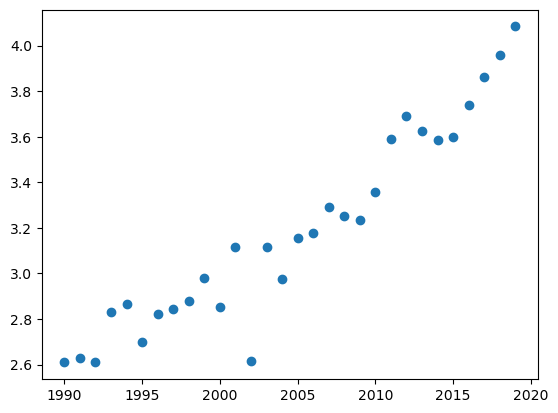

In [32]:
plt.scatter(india_years_array, india_rice_yield_array)

In [33]:
###We access each country's data and plot against time
###China!
china_df = working_df_dated_country[working_df_dated_country.Country == "China"]
china_rice_yield_df, china_years_df = get_features_targets(china_df, ["Rice Yield"], ["Year"])
china_rice_yield_df.reset_index(drop = True, inplace = True)
china_rice_yield_array = china_rice_yield_df.to_numpy()
china_years_array = china_years_df.to_numpy()
#print(china_rice_yield_array)
#print(china_years_array)

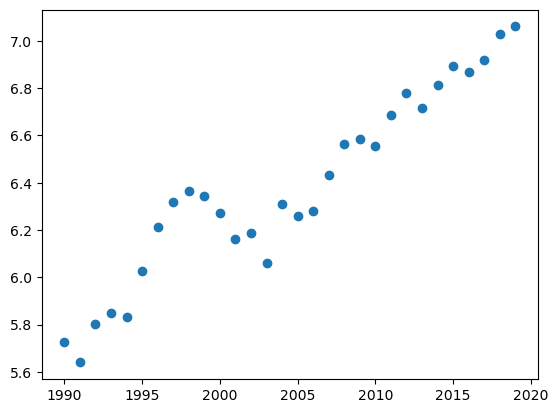

In [34]:
plt.scatter(china_years_array,china_rice_yield_array)

In [35]:
###We access each country's data and plot against time
###Thailand!
thailand_df = working_df_dated_country[working_df_dated_country.Country == "Thailand"]
thailand_rice_yield_df, thailand_years_df = get_features_targets(thailand_df, ["Rice Yield"], ["Year"])
thailand_rice_yield_df.reset_index(drop = True, inplace = True)
thailand_rice_yield_array = thailand_rice_yield_df.to_numpy()
thailand_years_array = thailand_years_df.to_numpy()
#print(china_rice_yield_array)
#print(china_years_array)

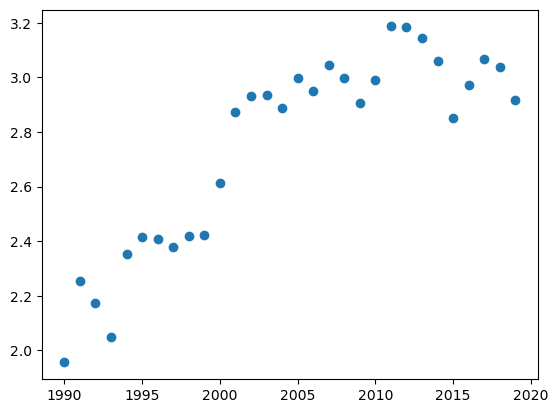

In [36]:
plt.scatter(thailand_years_array,thailand_rice_yield_array)

In [37]:
###We access each country's data and plot against time
###Vietnam!
vietnam_df = working_df_dated_country[working_df_dated_country.Country == "Vietnam"]
vietnam_rice_yield_df, vietnam_years_df = get_features_targets(vietnam_df, ["Rice Yield"], ["Year"])
vietnam_rice_yield_df.reset_index(drop = True, inplace = True)
vietnam_rice_yield_array = vietnam_rice_yield_df.to_numpy()
vietnam_years_array = vietnam_years_df.to_numpy()
#print(vietnam_rice_yield_df)
#print(china_rice_yield_array)
#print(china_years_array)

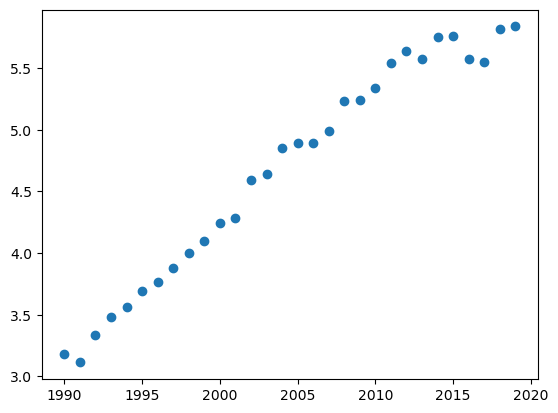

In [38]:
plt.scatter(vietnam_years_array, vietnam_rice_yield_array)

In [39]:
india_rice_yield_df.rename(columns={"Rice Yield": "India Rice Yield"}, inplace = True)
china_rice_yield_df.rename(columns={"Rice Yield": "China Rice Yield"}, inplace = True)
thailand_rice_yield_df.rename(columns={"Rice Yield": "Thailand Rice Yield"}, inplace = True)
vietnam_rice_yield_df.rename(columns={"Rice Yield": "Vietnam Rice Yield"}, inplace = True)

C:\Users\yxlsa\AppData\Local\Temp\ipykernel_22716\1854729494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_rice_yield_df.rename(columns={"Rice Yield": "India Rice Yield"}, inplace = True)
C:\Users\yxlsa\AppData\Local\Temp\ipykernel_22716\1854729494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_rice_yield_df.rename(columns={"Rice Yield": "China Rice Yield"}, inplace = True)
C:\Users\yxlsa\AppData\Local\Temp\ipykernel_22716\1854729494.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [40]:
crop_yield_df = pd.concat([india_years_df, india_rice_yield_df, china_rice_yield_df, thailand_rice_yield_df, vietnam_rice_yield_df], axis = 1)
print(crop_yield_df)

    Year  India Rice Yield  China Rice Yield  Thailand Rice Yield  \
0   1990            2.6125            5.7261               1.9556   
1   1991            2.6271            5.6402               2.2534   
2   1992            2.6092            5.8031               2.1745   
3   1993            2.8303            5.8479               2.0497   
4   1994            2.8645            5.8311               2.3521   
5   1995            2.6972            6.0248               2.4158   
6   1996            2.8226            6.2122               2.4098   
7   1997            2.8457            6.3192               2.3788   
8   1998            2.8805            6.3662               2.4180   
9   1999            2.9782            6.3447               2.4244   
10  2000            2.8508            6.2716               2.6128   
11  2001            3.1158            6.1633               2.8739   
12  2002            2.6163            6.1890               2.9338   
13  2003            3.1177        

In [41]:
###Creates a csv file from the dataframe
#crop_yield_df.to_csv("df_crop_yield.csv", index=False)